In [1]:
import json
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [45]:
json_file = './data/Validation/중립.json'
with open(json_file, "r", encoding="utf-8") as f:
    dataset = json.load(f)

output_folder = "cropped_neutral"
os.makedirs(output_folder, exist_ok=True)

In [46]:
for i, item in enumerate(dataset, 1):
    filename = item["filename"]
    image_path = os.path.join(r"C:\Users\User\PycharmProjects\PythonProject\data\Validation\중립", filename)

    try:
        image = Image.open(image_path).convert("RGB")
        image = np.array(image)

        if image is None or image.size == 0:
            print(f"❌ 이미지 로딩 실패: {image_path}")
            continue

        bbox = item["annot_A"]["boxes"]
        x1, y1 = int(bbox["minX"]), int(bbox["minY"])
        x2, y2 = int(bbox["maxX"]), int(bbox["maxY"])

        # 좌표 유효성 확인
        if x2 <= x1 or y2 <= y1:
            print(f"❌ 잘못된 바운딩 박스: {filename}")
            continue

        face_crop = image[y1:y2, x1:x2]

        if face_crop.size == 0:
            print(f"❌ 빈 이미지 crop: {filename}")
            continue

        # RGB to BGR 변환 (cv2는 BGR 사용)
        face_crop_bgr = cv2.cvtColor(face_crop, cv2.COLOR_RGB2BGR)

        new_filename = f"cropped_neutral{i}.jpg"
        save_path = os.path.join(output_folder, new_filename)

        success = cv2.imwrite(save_path, face_crop_bgr)
        if not success:
            print(f"❌ 저장 실패: {save_path}")

    except Exception as e:
        print(f"❌ 오류 발생: {filename}")
        print(f"   🔥 오류 내용: {e}")

print("✅ Crop and save completed.")

❌ 빈 이미지 crop: d46ddbfacc8e394085628ad657808f6e1861d73a9b379f250afa9db3b7e894fa_여_20_중립_상업시설&점포&시장_20210205145807-003-006.jpg
❌ 빈 이미지 crop: 0b33836b914f544c31e3a642ccccbb94114040537440b4df3b9250d025fc39a5_여_20_중립_교통&이동수단(엘리베이터 포함)_20210209152124-002-008.jpg
❌ 빈 이미지 crop: e727ffe2667a4b0ebb8c92d67d7e924f08f840228e898ffe7f3810850ef6dade_여_20_중립_공공시설&종교&의료시설_20210225161331-001-001.jpg
❌ 빈 이미지 crop: 7d316d614dbd22b33df44768199cffa8212ad676673c6bf02b50e1834f8cf2cb_여_20_중립_실외 자연환경_20210210141933-007-004.jpg
❌ 빈 이미지 crop: 7d316d614dbd22b33df44768199cffa8212ad676673c6bf02b50e1834f8cf2cb_여_20_중립_숙박 및 거주공간_20210210134642-010-030.jpg
❌ 빈 이미지 crop: 75c5623c1ff04d118f654598dc777ab3aa13f62762f36f6351b8e980db927cbe_남_20_중립_숙박 및 거주공간_20210225002301-010-002.jpg
❌ 빈 이미지 crop: bd210c67f8f6d1d3b34e1f724f26a0460a5e683af5c500b8acacc8be9af35db0_여_20_중립_상업시설&점포&시장_20210210223903-003-012.jpg
❌ 빈 이미지 crop: 7d316d614dbd22b33df44768199cffa8212ad676673c6bf02b50e1834f8cf2cb_여_20_중립_숙박 및 거주공간_20210210134642-010-028.j

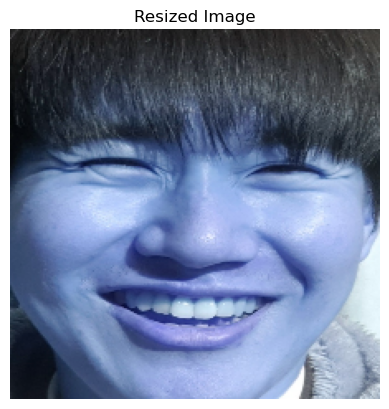

In [8]:
image = cv2.imread(r"C:\Users\User\PycharmProjects\PythonProject\data\Validation\cropped_happy\cropped_4.jpg")

resize_image = cv2.resize(image, (224, 224))

plt.imshow(resize_image)
plt.title("Resized Image")
plt.axis('off')
plt.show()